<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;"><img src="https://pbs.twimg.com/profile_images/1187259618/unidata_logo_rgb_sm_400x400.png" alt="Unidata Logo" style="height: 98px;"></div>

<h1>Basic Time Series Plotting with netCDF Data</h1>
<h3>Unidata Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://matplotlib.org/_images/date_demo.png" alt="METAR" style="height: 300px;"></div>


## Overview:

* **Teaching:** 45 minutes
* **Exercises:** 45 minutes

### Questions
1. What is netCDF?
2. How do we access netCDF data in Python?
3. How are plots created in Python?
4. What features does Matplotlib have improving our time series plots?
5. How can we employ Python to make more complicated plots without complicated code?

### Objectives
1. Open local netCDF data
2. Extract information from netCDF data
3. Make a plot of the data
4. Enhance plot
5. Expand plots without copy and pasting code

## What is netCDF?

"(Network Common Data Form) is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data." So what exactly does that mean?

A netCDF file contains:

- Groups: Logically arrange file contents
- Variables: Stores the actual data in N-dimensional arrays. Each variable has a datatype defining what's type of data are contained:
  - integer (1, 2, 4, or 8 bytes)
  - floating point (4 or 8 bytes)
  - string
  - compound data types
- Dimensions: Defines the dimensions (and their sizes) for variables and are optionally shared between variables.
- Attributes: Defines metadata for variables, groups, or globally for the file (dataset) itself.

netCDF4 files can also (optionally) be compressed internally using gzip (deflate) compression. It's a convenient way to store many types of data without needing to create new binary representations of the data to store it or new libraries with which to read that format.

netCDF also has conventions for attribute metadata and ways to lay out data within variables, such as the Climate and Forecasting (CF) conventions. These allow generic tools to be written against these conventions and handle different dataset.

## netCDF in Python
The flexibility of netCDF files can make code a little verbose when writing in statically-typed languages like C. This is a result of the fact that the types for arrays needed to store data aren't known until the file is opened and read in (or the types are hard-coded, making the code less flexible). In Python, however, we have numpy arrays which map very naturally to numpy arrays.

In Python, the predominant package for reading netCDF files is netCDF4-python, written by Jeff Whittaker of ESRL. This library wraps the official C library and exposes almost all of the available functionality.

The main entry point for this library is the `Dataset` class, which allows us to open a netCDF file.

In [1]:
# This is the usual way we import the class
from netCDF4 import Dataset

In [2]:
# Open one of the local netCDF files
gfs_data = Dataset('../../data/model-gfs.nc')
print(gfs_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CDM-Extended-CF
    history: Written by CFPointWriter
    title: Extract Points data from Grid file /data/ldm/pub/native/grid/NCEP/GFS/Global_0p25deg/GFS-Global_0p25deg.ncx3
    featureType: timeSeriesProfile
    time_coverage_start: 2015-07-17T21:00:00Z
    time_coverage_end: 2015-07-20T18:00:00Z
    geospatial_lat_min: 39.9995
    geospatial_lat_max: 40.0005
    geospatial_lon_min: -105.0005
    geospatial_lon_max: -104.9995
    dimensions(sizes): profile(24), station(1), isobaric3(1), station_name_strlen(10), station_description_strlen(33)
    variables(dimensions): float32 Convective_available_potential_energy_surface(station,profile), float32 Convective_inhibition_surface(station,profile), float32 Temperature_surface(station,profile), float32 isobaric3(station,profile,isobaric3), float32 u-component_of_wind_isobaric(station,profile,isobaric3), float32 Temperature_isobaric(station

When we print the dataset, we are shown information about the file, such as the global metadata as well as the dimensions and variables. From here, it's straightforward to extract any variables we want from the `.variables` attribute, which is a dictionary mapping variable name to a `Variable` object:

In [3]:
gfs_data.variables

OrderedDict([('Convective_available_potential_energy_surface',
              <class 'netCDF4._netCDF4.Variable'>
              float32 Convective_available_potential_energy_surface(station, profile)
                  standard_name: Convective_available_potential_energy_surface
                  long_name: Convective_available_potential_energy_surface
                  units: J/kg
                  coordinates: time longitude latitude
              unlimited dimensions: 
              current shape = (1, 24)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('Convective_inhibition_surface',
              <class 'netCDF4._netCDF4.Variable'>
              float32 Convective_inhibition_surface(station, profile)
                  standard_name: Convective_inhibition_surface
                  long_name: Convective_inhibition_surface
                  units: J/kg
                  coordinates: time longitude latitude
              unlimited dimensions: 

In [4]:
# Let's strip down that big dictionary and just get a *list* of the variable names.
# How can we do that?


So let's now dig out one of the variables from that file and see what it looks like:

In [5]:
temp_var = gfs_data.variables['Temperature_surface']
print(temp_var)

<class 'netCDF4._netCDF4.Variable'>
float32 Temperature_surface(station, profile)
    standard_name: Temperature_surface
    long_name: Temperature_surface
    units: K
    coordinates: time longitude latitude
unlimited dimensions: 
current shape = (1, 24)
filling on, default _FillValue of 9.969209968386869e+36 used



Attributes on variables and the file map to attributes in Python. So to print out the "Conventions" attribute in Python:

In [6]:
print(gfs_data.Conventions)

CDM-Extended-CF


Or for a variable we do:

In [7]:
print(temp_var.coordinates)

time longitude latitude


To work with the data itself, we use the `Variable` instance saved earlier, `temp_var`. Using that we can look at the shape (size along each dimension) of the variable:

In [8]:
# What might this look like?

# What about printing the number of dimensions?


So far, all we've read from the file is the metadata--no data from any of the variables has been parsed and read in yet. To do so, we can slice on `temp_var`, which returns the data in a numpy array:

In [9]:
temp_var[:]

array([[ 310.70001221,  308.        ,  296.3999939 ,  289.5       ,
         288.5       ,  287.1000061 ,  301.1000061 ,  308.29998779,
         311.5       ,  305.1000061 ,  295.6000061 ,  292.3999939 ,
         290.3999939 ,  289.1000061 ,  299.3999939 ,  307.8999939 ,
         316.6000061 ,  293.8999939 ,  291.20001221,  289.79998779,
         287.1000061 ,  285.79998779,  303.29998779,  310.        ]], dtype=float32)

Of course, any of the indexing operations we use with numpy arrays should work here. For instance:

In [10]:
# Grab the first 10 values

# Grab every other point


Let's look now at the time variable:

In [11]:
time_var = gfs_data.variables['time']
print(time_var)

<class 'netCDF4._netCDF4.Variable'>
float64 time(station, profile)
    units: Hour since 2015-07-14T00:00:00Z
    calendar: proleptic_gregorian
    standard_name: time
    long_name: GRIB forecast or observation time
unlimited dimensions: 
current shape = (1, 24)
filling on, default _FillValue of 9.969209968386869e+36 used



netCDF4-python also provides some very useful utility functions for converting times stored in netCDF files (as floats or ints) into Python `datetime` instances we can easily work with:

In [12]:
# This is how we can make a datetime by hand
from datetime import datetime

datetime(2017, 4, 1, 17, 32, 56)

datetime.datetime(2017, 4, 1, 17, 32, 56)

In [13]:
from netCDF4 import num2date

times = num2date(time_var[:], time_var.units)
print(times)

[[datetime.datetime(2015, 7, 17, 21, 0)
  datetime.datetime(2015, 7, 18, 0, 0) datetime.datetime(2015, 7, 18, 3, 0)
  datetime.datetime(2015, 7, 18, 6, 0) datetime.datetime(2015, 7, 18, 9, 0)
  datetime.datetime(2015, 7, 18, 12, 0)
  datetime.datetime(2015, 7, 18, 15, 0)
  datetime.datetime(2015, 7, 18, 18, 0)
  datetime.datetime(2015, 7, 18, 21, 0)
  datetime.datetime(2015, 7, 19, 0, 0) datetime.datetime(2015, 7, 19, 3, 0)
  datetime.datetime(2015, 7, 19, 6, 0) datetime.datetime(2015, 7, 19, 9, 0)
  datetime.datetime(2015, 7, 19, 12, 0)
  datetime.datetime(2015, 7, 19, 15, 0)
  datetime.datetime(2015, 7, 19, 18, 0)
  datetime.datetime(2015, 7, 19, 21, 0)
  datetime.datetime(2015, 7, 20, 0, 0) datetime.datetime(2015, 7, 20, 3, 0)
  datetime.datetime(2015, 7, 20, 6, 0) datetime.datetime(2015, 7, 20, 9, 0)
  datetime.datetime(2015, 7, 20, 12, 0)
  datetime.datetime(2015, 7, 20, 15, 0)
  datetime.datetime(2015, 7, 20, 18, 0)]]


### Exercise: (15 minutes)

Now your turn: There's another data file in `data/` called `model-nam.nc`. The goal is to read in the data from a particular day, 19 July 2015, for any of the data variables in the file. This will require applying some of the numpy tricks we've learned as well as what we've learned so far about netCDF files. Be sure to make use of the fact that you can print and interrogate the file and variables.

In [14]:
# Open the file

# Grab the `time` variable from the file and convert to datetimes

# Grab one of the other data variables from the file

# Use the information from time to subset the variable

# Bonus points: Use the boolean arrays to index the variable rather than
# indices for the time dimension
# Hint: You can compare the boolean array against a dateime object
# Other hint: You will need to squeeze() the values to a 1D array.

## Plotting with Matplotlib

Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

In [15]:
# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

In [16]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

In [17]:
# Grab some data from the netCDF file to plot
times = gfs_data.variables['time'][0]
temps = gfs_data.variables['Temperature_surface'][0]

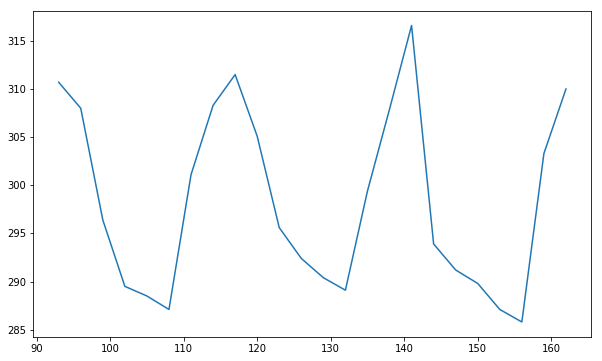

In [18]:
# Go ahead and explicitly create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot times as x-variable and temperatures as y-variable
ax.plot(times, temps)

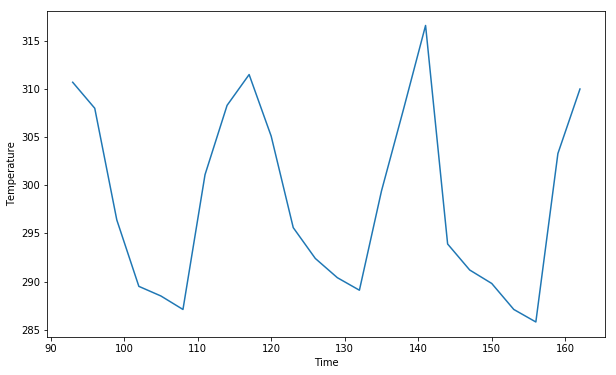

In [19]:
# Add some labels to the plot
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

# Prompt the notebook to re-display the figure
fig

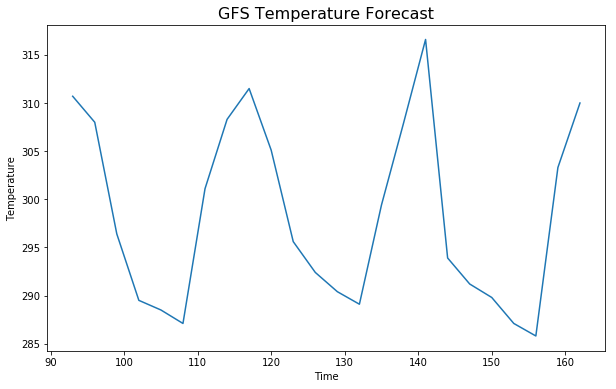

In [20]:
# Let's add a title with a bit of latex syntax
ax.set_title('GFS Temperature Forecast', fontdict={'size':16})

fig

Of course, we can do so much more...

In [21]:
# Grab some more data
temps_iso = gfs_data.variables['Temperature_isobaric'][0, :, 0]

# Also convert the times to datetimes--how does that go again?
time_var = gfs_data.variables['time']
times = num2date(time_var[0], time_var.units)

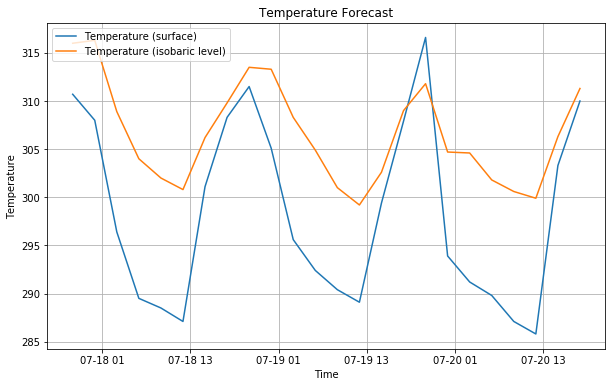

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot two series of data
# The label argument is used when generating a legend.
ax.plot(times, temps, label='Temperature (surface)')
ax.plot(times, temps_iso, label='Temperature (isobaric level)')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')

# Add gridlines
ax.grid(True)

# Add a legend to the upper left corner of the plot
ax.legend(loc='upper left')

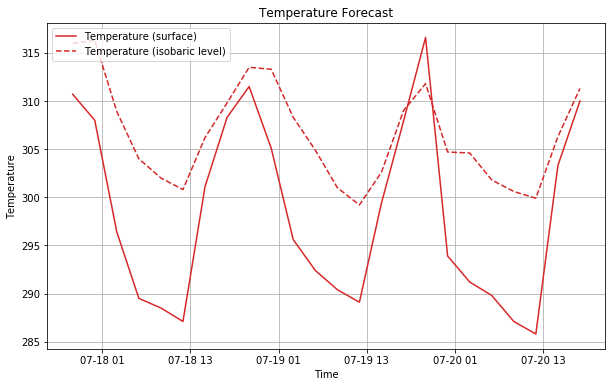

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(times, temps_iso, color='tab:red', linestyle='--',
        label='Temperature (isobaric level)')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')
ax.grid(True)
ax.legend(loc='upper left')

### Exercise (20 min):
It's your turn again: read in the `Temperature_surface` and `Temperature_height_above_ground` variables from the `model-nam.nc` dataset. Plot those together on a single axes. Make sure your plot is:

- Properly labelled
- Has line styles of your choosing
- Has a legend for the traces

Bonus points: Make the legend entry for `Temperature_height_above_ground` show the actual height for the forecast. Don't hard-code this, but dynamically do it based on the netCDF file.

Resources:

- Matplotlib style
- Matplotlib gallery

In [24]:
# Read in the dataset

# Pull out the variables and process--this includes calling num2date on the times

# Create your figure and axes

# Plot the data

# Customize: grid, legend, labels, title, etc.

## More complicated plots

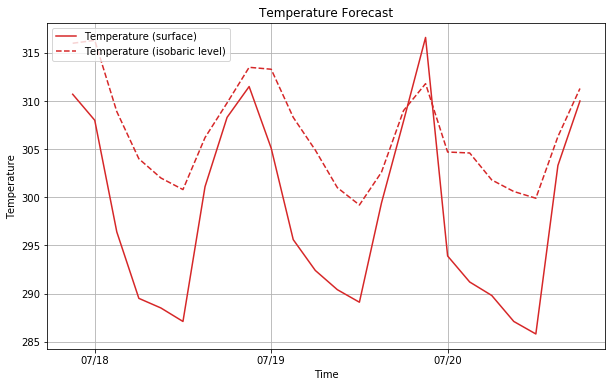

In [25]:
# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, DayLocator

# Same as before
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(times, temps_iso, color='tab:red', linestyle='--',
        label='Temperature (isobaric level)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')
ax.grid(True)
ax.legend(loc='upper left')

# Set the x-axis to do major ticks on the days and label them like 'Jul 20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

What about figures with more than one axes?

In [26]:
# Reload our data just to be sure
time_var = gfs_data.variables['time']
times = num2date(time_var[0], time_var.units)
temps = gfs_data.variables['Temperature_surface'][0]

# Grab relative humidity
relh = gfs_data.variables['Relative_humidity_isobaric'][0]

To make multi-axes plots, just tell `subplots()` how many rows and columns you want:

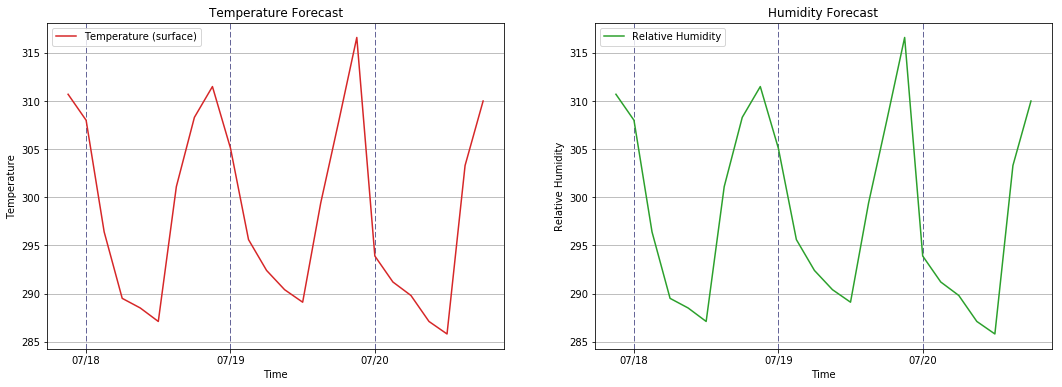

In [27]:
# ShareX means that the axes will share range, ticking, etc. for the x axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18, 6))

# Panel 1
ax1.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature Forecast')
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.grid(axis='x', linestyle='--', color='#666699', linewidth=1.0)
ax1.grid(axis='x', which='minor')

# Not repeated only by sharing x
ax1.xaxis.set_major_formatter(DateFormatter('%m/%d'))
ax1.xaxis.set_major_locator(DayLocator())

# Panel 2
ax2.plot(times, temps, color='tab:green', label='Relative Humidity')
ax2.set_xlabel('Time')
ax2.set_ylabel('Relative Humidity')
ax2.set_title('Humidity Forecast')
ax2.legend(loc='upper left')
ax2.grid(True)
ax2.grid(axis='x', linestyle='--', color='#666699', linewidth=1.0)
ax2.grid(axis='x', which='minor')

So even with the sharing of axis information, there's still a lot of repeated code. This current version with just two parameters might still be ok, but:

- What if we had more data being plotted on each axes?
- What if we had 4 subplots (from, say, multiple files)?
- What if we wanted to change one of the parameters?

Together, let's explore how to improve this plot.

### Iteration and zip

Suppose we have two lists we want to loop over in lock step, how do we do that in Python?

In [28]:
# So one is simple enough
netcdf_variables = ['Temperature_surface', 'Relative_humditity_isobaric']
for name in netcdf_variables:
    print(name)

Temperature_surface
Relative_humditity_isobaric


In [29]:
# What about two?
netcdf_variables = ['Temperature_surface', 'Relative_humditity_isobaric']
good_names = ['Temperature', 'Relative Humidity']
for z in zip(netcdf_variables, good_names):
    print(z)

('Temperature_surface', 'Temperature')
('Relative_humditity_isobaric', 'Relative Humidity')


In [30]:
# Using Python's unpacking syntax, we can extract those paired values into separate named variables
for var_name, name in zip(netcdf_variables, good_names):
    print(var_name, '->', name)

Temperature_surface -> Temperature
Relative_humditity_isobaric -> Relative Humidity


In [31]:
# Now, how can we use Python looping and zip to avoid the duplicated and inflexible code?
























#### One Approach

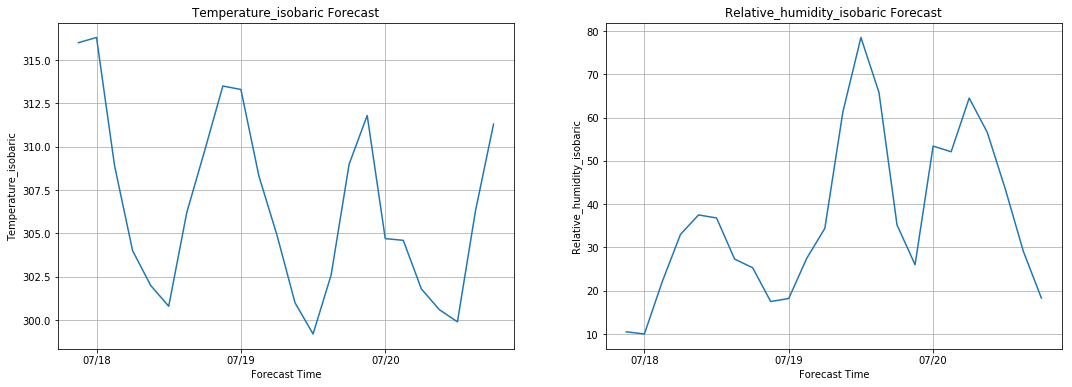

In [32]:
# A list of names of variables we want to plot
variables = ['Temperature_isobaric', 'Relative_humidity_isobaric']

# Make our figure, now choosing number of subplots based on length of variable name list
fig, axes = plt.subplots(1, len(variables), sharex=True, figsize=(18, 6))

# Grab times outside the loop
time_var = gfs_data.variables['time']
times = num2date(time_var[0], time_var.units)

# Loop over the list of subplots and names together
for ax, var_name in zip(axes, variables):
    # Grab the data from the file based on the name
    var_data = gfs_data.variables[var_name][0]

    # Plot
    ax.plot(times, var_data)

    # Set label/title based on variable name--no longer hard-coded
    ax.set_ylabel(var_name)
    ax.set_title('{0} Forecast'.format(var_name))

    # Set up our formatting--note lack of repetition
    ax.grid(True)
    ax.set_xlabel('Forecast Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

Of course, now we've lost our formatting, plus the labels aren't as nice.

### Dictionaries, functions, and string manipulation
So that we can get back to where we started, let's bring a couple more Python tools to bear on this problem:

- Dictionaries
- Functions
- String manipulation

Functions allow us to encapsulate a chunk of functionality, allowing for re-use as well as making it less complicated to understand the code where the function is used.

In [33]:
# We have something like "Temperature_isobaric". How do we make it "Temperature"?
def make_plot_name(var_name):
    return var_name  # Currently we do nothing

Dictionaries in Python allow an arbitrary mapping between things, like say between a string name and a color:

In [34]:
# Create a dictionary mapping keys to values, which is specified as key:value
colors = {'Temperature_isobaric': 'tab:red', 'Relative_humidity_isobaric': 'tab:green'}

# Now we can look up in the dictionary like so:
colors['Temperature_isobaric']

'tab:red'

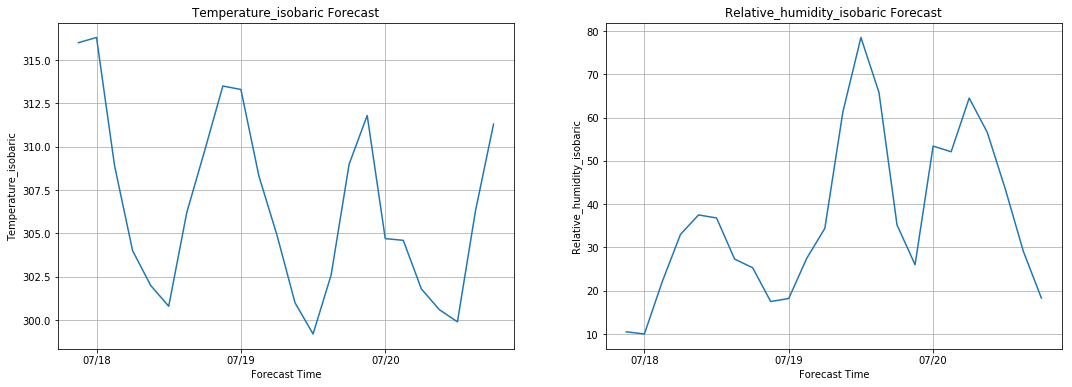

In [35]:
# Here's what we had before, how can we apply what we did above?
variables = ['Temperature_isobaric', 'Relative_humidity_isobaric']
colors = {'Temperature_isobaric': 'tab:red', 'Relative_humidity_isobaric': 'tab:green'}

fig, axes = plt.subplots(1, len(variables), sharex=True, figsize=(18, 6))

time_var = gfs_data.variables['time']
times = num2date(time_var[0], time_var.units)

for ax, var_name in zip(axes, variables):
    var_data = gfs_data.variables[var_name][0]

    ax.plot(times, var_data)
    ax.set_ylabel(var_name)
    ax.set_title('{0} Forecast'.format(var_name))
    ax.grid(True)
    ax.set_xlabel('Forecast Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

#### One approach

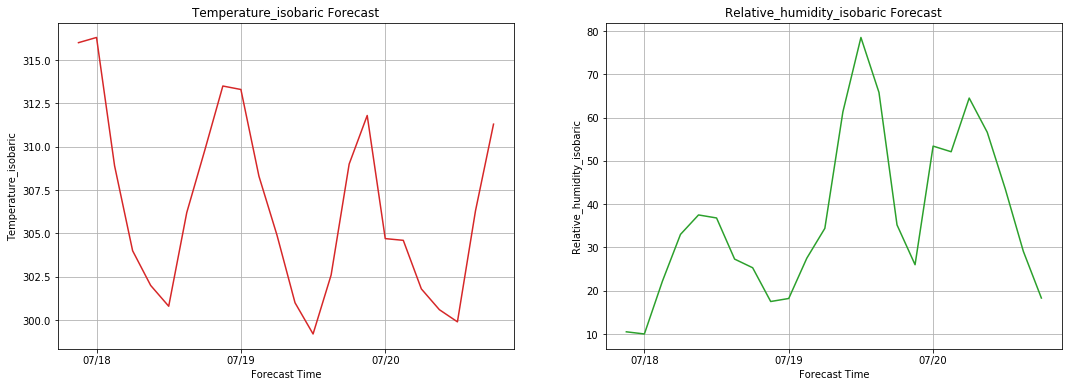

In [36]:
# Here's what we had before, how can we apply what we did above?
variables = ['Temperature_isobaric', 'Relative_humidity_isobaric']
colors = {'Temperature_isobaric': 'tab:red', 'Relative_humidity_isobaric': 'tab:green'}

fig, axes = plt.subplots(1, len(variables), sharex=True, figsize=(18, 6))

time_var = gfs_data.variables['time']
times = num2date(time_var[0], time_var.units)

for ax, var_name in zip(axes, variables):
    var_data = gfs_data.variables[var_name][0]

    # Grab the color from our dictionary and pass it to plot()
    color = colors[var_name]
    ax.plot(times, var_data, color)

    # Use our function to tranform the name
    name = make_plot_name(var_name)
    ax.set_ylabel(name)
    ax.set_title('{0} Forecast'.format(name))

    ax.grid(True)
    ax.set_xlabel('Forecast Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

### Well what about multiple files?
Let's see how we can apply `enumerate` to solve this problem.

In [37]:
# Enumerate allows us to iterate over a list and get the corresponding index
for ind, filename in enumerate(['model-gfs.nc', 'model-nam.nc']):
    print(ind, filename)

0 model-gfs.nc
1 model-nam.nc


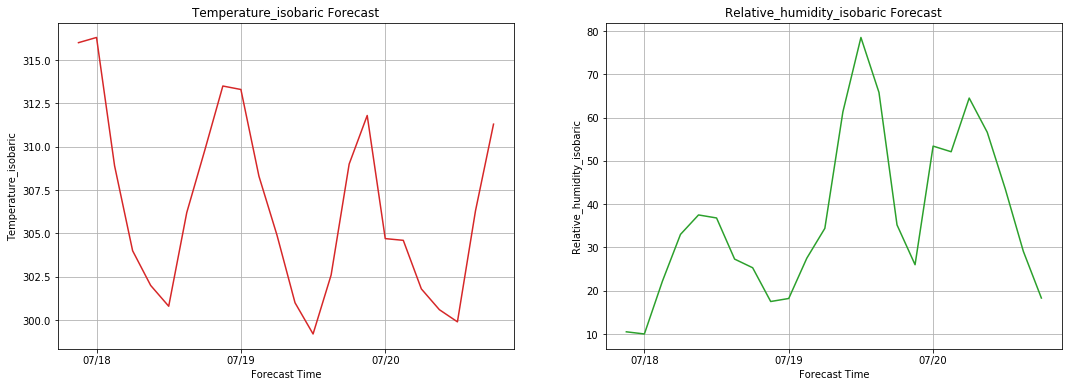

In [38]:
files = ['model-gfs.nc', 'model-nam.nc']

# Here's where we left off on the last one:
variables = ['Temperature_isobaric', 'Relative_humidity_isobaric']
colors = {'Temperature_isobaric': 'tab:red', 'Relative_humidity_isobaric': 'tab:green'}

fig, axes = plt.subplots(1, len(variables), sharex=True, figsize=(18, 6))

time_var = gfs_data.variables['time']
times = num2date(time_var[0], time_var.units)

for ax, var_name in zip(axes, variables):
    var_data = gfs_data.variables[var_name][0]
    color = colors[var_name]
    ax.plot(times, var_data, color)

    name = make_plot_name(var_name)
    ax.set_ylabel(name)
    ax.set_title('{0} Forecast'.format(name))

    ax.grid(True)
    ax.set_xlabel('Forecast Time')
    ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(DayLocator())

#### Here's one approach

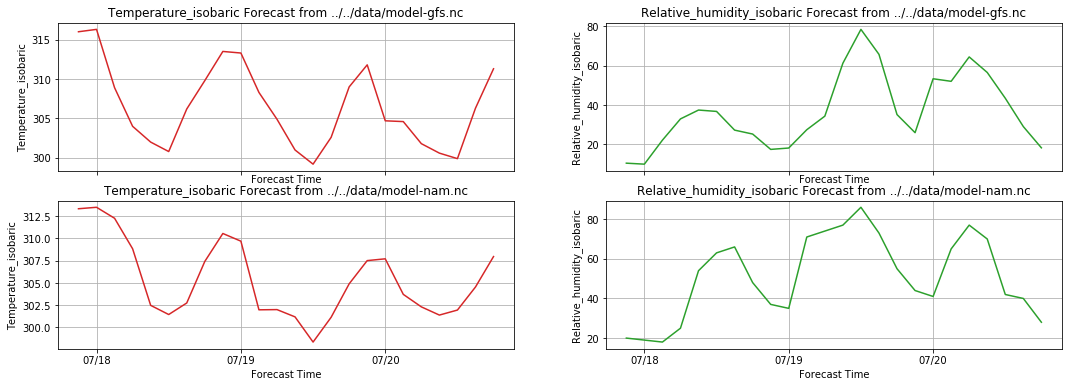

In [39]:
files = ['../../data/model-gfs.nc', '../../data/model-nam.nc']
variables = ['Temperature_isobaric', 'Relative_humidity_isobaric']
colors = {'Temperature_isobaric': 'tab:red', 'Relative_humidity_isobaric': 'tab:green'}

fig, axes = plt.subplots(len(files), len(variables), sharex=True, figsize=(18, 6))

time_var = gfs_data.variables['time']
times = num2date(time_var[0], time_var.units)

for row, filename in enumerate(files):
    netcdf_data = Dataset(filename)
    for col, var_name in enumerate(variables):
        # Grab our Axes here based on what the appropriate row/column is
        ax = axes[row, col]

        var_data = netcdf_data.variables[var_name][0]
        color = colors[var_name]
        ax.plot(times, var_data, color)

        name = make_plot_name(var_name)
        ax.set_ylabel(name)
        ax.set_title('{0} Forecast from {1}'.format(name, filename))

        ax.grid(True)
        ax.set_xlabel('Forecast Time')
        ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))
        ax.xaxis.set_major_locator(DayLocator())

## More Advanced Plot Configurations

This is an example of using more of matplotlib's date ticker functionality to tick and format days vs. 6-hour times separately.

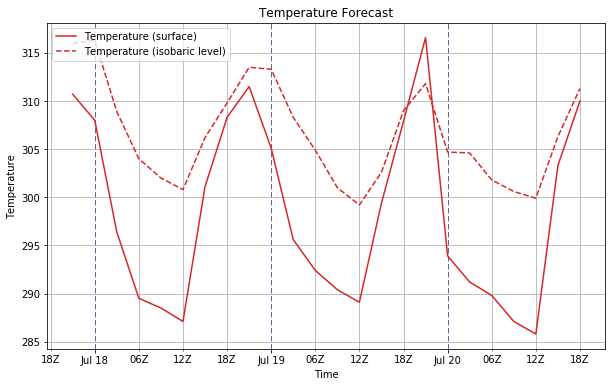

In [40]:
# Import some tools from matplotlib to tinker with the location and format of dates
from matplotlib.dates import DateFormatter, DayLocator, HourLocator

# Same as before
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(times, temps_iso, color='tab:red', linestyle='--',
        label='Temperature (isobaric level)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')
ax.grid(True)
ax.legend(loc='upper left')

# Set the x-axis to do major ticks on the days and label them like 'Jul 20'
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# Set up minor ticks with the hours 6, 12, 18 written as '18Z'
ax.xaxis.set_minor_locator(HourLocator(range(6, 24, 6)))
ax.xaxis.set_minor_formatter(DateFormatter('%HZ'))

# Highlight the major x-axis grid lines with a thicker, dashed line
ax.grid(axis='x', linestyle='--', color='#666699', linewidth=1.0)
ax.grid(axis='x', which='minor')

## Other "structured plotting" examples

In [41]:
# This is just to keep the different cells in the notebook from rehashing this
def set_defaults(ax):
    # Set the x-axis to do major ticks on the days and label them like 'Jul 20'
    from matplotlib.dates import DateFormatter, DayLocator, HourLocator
    ax.xaxis.set_major_locator(DayLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

    # Set up minor ticks with the hours 6, 12, 18 written as '18Z'
    ax.xaxis.set_minor_locator(HourLocator(range(6, 24, 6)))
    ax.xaxis.set_minor_formatter(DateFormatter('%HZ'))

    # Highlight the major x-axis grid lines with a thicker, dashed line
    ax.grid(axis='x', linestyle='--', color='#666699', linewidth=1.0)
    ax.grid(which='minor', axis='x')
    ax.grid(axis='y')
    
    # Normal x-axis label
    ax.set_xlabel('Forecast time (UTC)', fontdict=dict(size=16))

In [42]:
def make_plot_name(var_name):
    return ' '.join(varname.split('_')[:-1])

In [43]:
gfs_data = Dataset('../../data/model-gfs.nc')

### Passing keyword arguments from a dictionary

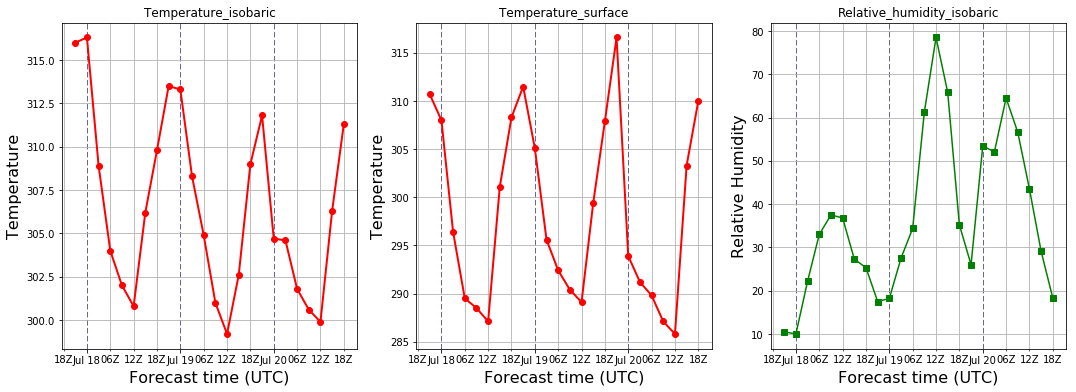

In [44]:
styles = {'Temperature': dict(color='red', marker='o', linestyle='-', linewidth=2),
          'Relative humidity': dict(color='green', marker='s')}

varnames = ['Temperature_isobaric', 'Temperature_surface', 'Relative_humidity_isobaric']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, varname in zip(axes, varnames):
    # Grab name, and use it to get styles to pass to plot
    name = make_plot_name(varname)
    ax.plot(times, gfs_data.variables[varname][0], **styles[name])

    ax.set_ylabel(name.title(), fontdict=dict(size=16))
    ax.set_title(varname)
    set_defaults(ax)

### Some common, some differing styles

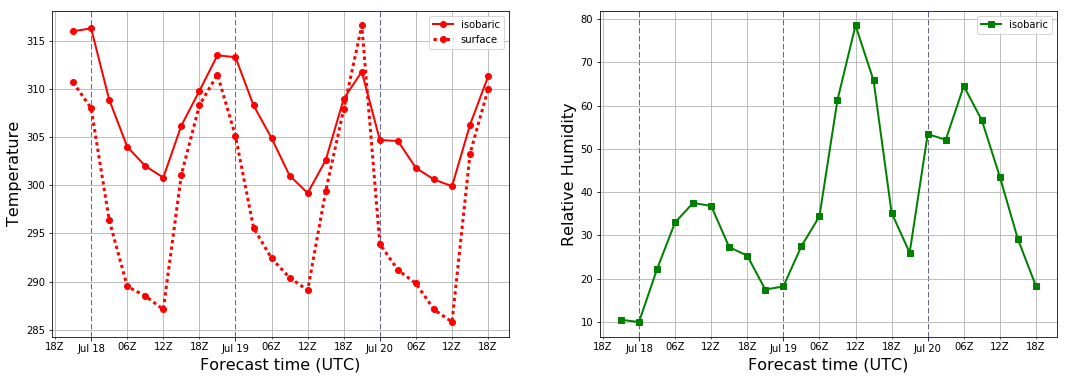

In [45]:
# Take Relative_humidity_isobaric and return ('Relative humidity', 'isobaric')
def split_varname(varname):
    parts = varname.split('_')
    name = ' '.join(parts[:-1])
    level = parts[-1]
    return name, level

type_styles = {'Temperature': dict(color='red', marker='o'),
               'Relative humidity': dict(color='green', marker='s')}

level_styles = {'isobaric': dict(linestyle='-', linewidth=2),
                'surface': dict(linestyle=':', linewidth=3)}

# Keeping converters from above
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Looping over each subplot
for ax, varnames in zip(axes, (['Temperature_isobaric', 'Temperature_surface'], ['Relative_humidity_isobaric'])):
    # Loop over each variable in a subplot
    for varname in varnames:
        # Get name and level now
        name, level = split_varname(varname)

        vardata = gfs_data.variables[varname][0]

        # Combine styles and plot, passing in level as the line label for the legend
        styles = type_styles[name].copy()  # so next line doesn't change original
        styles.update(level_styles[level])
        ax.plot(times, vardata, label=level, **styles)

    # These only need to be done once per subplot, not per-variable plotted
    ax.set_ylabel(name.title(), fontdict=dict(size=16))
    set_defaults(ax)
    ax.legend(loc='best')

### Another multi-file approach

In [46]:
# Create empty dict where we'll store stuff
import glob
import os.path

model_data = dict()
for file in glob.glob('../../data/model-*.nc'):
    # Grab filename from pull path, then split off file extension
    basefile = os.path.splitext(os.path.basename(file))[0]

    # Grab part to right of '-' and make upper case
    modelname = basefile.split('-')[1].upper()
    print(modelname)
    
    # Open netcdf file and store under the model name
    model_data[modelname.upper()] = Dataset(file, 'r')

GFS
NAM


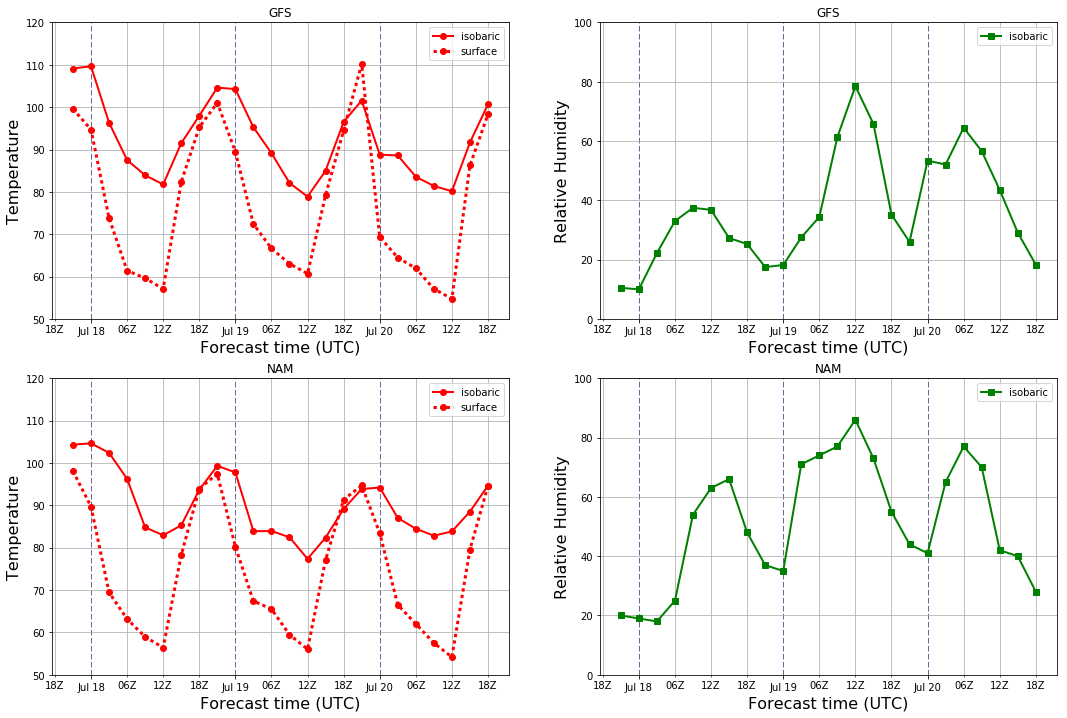

In [47]:
# Unify plot bounds
bounds = {'Temperature': (50, 120),
          'Relative humidity': (0, 100)}

def K2F(K):
    return 1.8 * (K - 273.15) + 32

def donothing(x):
    return x

converters = {'Temperature': K2F, 'Relative humidity': donothing}

# Keeping styles from above
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
for row, model in zip(axes, model_data):
    # Need to process each dataset here for their own time variables
    data = model_data[model]
    time_var = data['time']
    time = num2date(time_var[:], time_var.units).squeeze()

    # Now loop over each plot in the row
    for ax, varnames in zip(row, (['Temperature_isobaric', 'Temperature_surface'], ['Relative_humidity_isobaric'])):
        # And each variable in the plot
        for varname in varnames:
            name, level = split_varname(varname)
            var = data.variables[varname]
            vardata = converters[name](var[:].squeeze())

            # Plotting with combined style
            styles = type_styles[name].copy()  # so next line doesn't change original
            styles.update(level_styles[level])
            ax.plot(time, vardata, label=level, **styles)

        ax.set_xlabel('Forecast time (UTC)', fontdict=dict(size=14))
        ax.set_ylabel(name.title(), fontdict=dict(size=16))
        set_defaults(ax)
        ax.legend(loc='best')
        ax.set_title(model)
        ax.set_ylim(*bounds[name])